In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'],index_col='date')

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.sum()

value    87655771
dtype: int64

In [5]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]

In [6]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

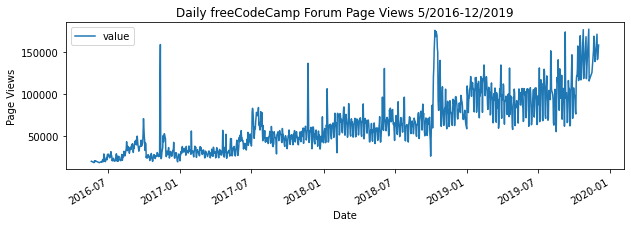

In [7]:
fig = df.plot(kind='line',figsize=(10,3)).figure
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

Text(0, 0.5, 'Page Views')

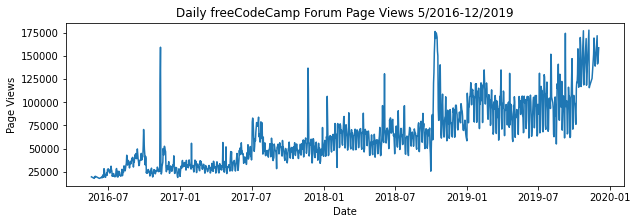

In [8]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df.index, df['value'])
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [9]:
df_bar = df.groupby([df.index.year,df.index.month])['value'].mean().unstack()

In [10]:
df_bar.head()

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


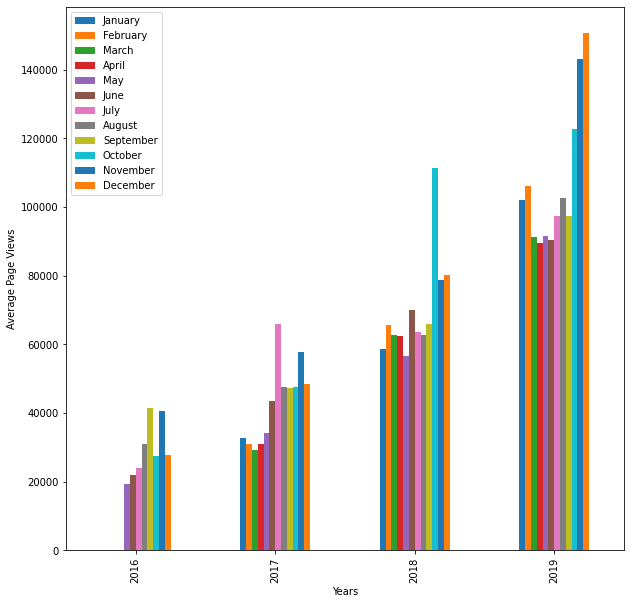

In [11]:
fig = df_bar.plot(kind='bar',legend=True,figsize=(10,10)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(labels=['January','February','March','April','May','June','July','August','September','October','November','December'])

In [12]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [41]:
df_box['monthnum'] = df_box['date'].dt.month
df_box = df_box.sort_values(by='monthnum')
df_box

,date,value,year,month,monthnum
595,2018-01-26,56792,2018,Jan,1
593,2018-01-24,61700,2018,Jan,1
594,2018-01-25,65438,2018,Jan,1
596,2018-01-27,48186,2018,Jan,1
597,2018-01-28,49485,2018,Jan,1
...,...,...,...,...,...
920,2018-12-20,90449,2018,Dec,12
919,2018-12-19,92070,2018,Dec,12
918,2018-12-18,96231,2018,Dec,12
178,2016-12-05,25527,2016,Dec,12


Text(0, 0.5, 'Page Views')

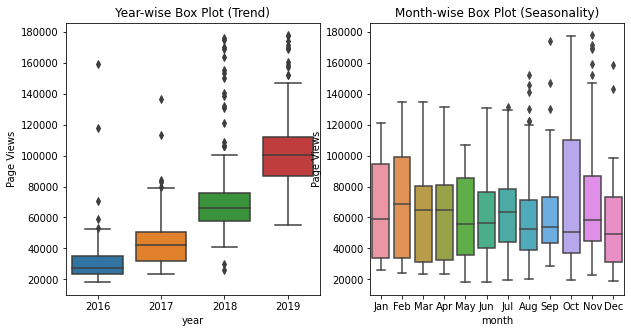

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0] = sns.boxplot(x=df_box['year'],y=df_box['value'],ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'],y=df_box['value'], ax=axes[1])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
